# Machine Learning

#### Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

## Load data

In [2]:
PATH = '../data/processed/'

### Dados das Escolas (SARESP)

In [3]:
dataset = pd.read_csv(os.path.join(PATH, 'dataset.csv'), sep=',')
print(dataset.shape)
dataset.head()

(1458, 66)


,CD_ESCOLA,ds_comp,PONTUACAO,DESEMPENHO,CITY,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,CLUSTER,SALAS_AULA,SALA_RECURSO,TOT_SALAS_AULA,CANTINA,COPA,REFEITORIO,SALA_LEITURA,TOT_SALA_LEITURA,TOT_QUADRA,SALA_PROF,PATIO_COBERTO,PATIO_DESCOBERTO,TOT_VESTIARIO,LAB_INFO,LAB_CIENCIAS,LAB_CIENCIA_FISICA_BIOLOGICA,TOT_LAB_CIENCIA,LAB_MULTIUSO,OFICINA,DORMITORIO,SANITARIO_ADEQ_DEF,SANITARIO_AL_MASC,SANITARIO_AL_FEM,TOT_SANITARIO_AL,TOT_SANITARIO_FUNC,DEPEND_ADEQ_DEF,SALA_ED_FISICA,SALA_PROG_ESC_FAMILIA,BRINQUEDOTECA,SALA_REFORCO,AREA_SERVICO,SALA_ATENDIMENTO,SALA_ENTRETENIMENTO,APERF/EXTENSIAOCULTURAL,BACHARELADO/TECNIOLOGO,DOUTORADO,ENSINO_MEDIO,ESPECIALIZACAO,LICENCIATURA,MESTRADO,S/INFO,QTD_SERVIDORES,COD_ESC,QTD_TOTAL_ALUNOS,QTD_CLASSES,QTD_ALUNOS_ANOS_INICIAIS,MEDIA_ALUNOS_SALA,STD_ALUNOS_SALA
0,36444,MATEMÁTICA,BASICO,RUIM,SAO PAULO,1.0,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,14,19,0,19,0,0,1,1,1,2,1,0,0,0,1,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.080000,0.040000,0.880000,0.0,0.0,25,36444,1435,36.0,1062.0,29.500000,3.075247
1,1582,MATEMÁTICA,BASICO,RUIM,SAO PAULO,1.0,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,14,14,1,15,1,0,2,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,3,3,6,3,0,1,1,0,0,0,0,0,0.0,0.030303,0.0,0.000000,0.090909,0.878788,0.0,0.0,33,1582,822,28.0,818.0,29.214286,1.618347
2,4388,MATEMÁTICA,BASICO,RUIM,SAO PAULO,1.0,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,14,26,0,26,1,0,1,1,1,2,1,2,1,0,1,0,1,1,0,0,0,0,3,3,6,2,0,1,0,0,0,0,0,0,0.0,0.037037,0.0,0.296296,0.037037,0.629630,0.0,0.0,27,4388,1599,48.0,1599.0,33.312500,2.814524
3,4424,MATEMÁTICA,ADEQUADO,BOM,SAO PAULO,1.0,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,14,11,1,12,1,0,1,1,1,2,1,1,0,0,1,0,0,0,0,0,0,1,1,1,2,0,0,2,0,1,0,0,0,0,0.0,0.031250,0.0,0.093750,0.031250,0.843750,0.0,0.0,32,4424,669,22.0,646.0,29.363636,1.176980
4,1739,MATEMÁTICA,ADEQUADO,BOM,SAO PAULO,1.0,1521.11,12176866.0,Urbano,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,14,8,1,9,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,2,2,0,1,0,0,0,0,0,0,0.0,0.047619,0.0,0.095238,0.000000,0.857143,0.0,0.0,21,1739,423,16.0,420.0,26.250000,2.489980


## Encoder

In [4]:
# le = LabelEncoder()
# dataset['DESEMPENHO'] = le.fit_transform(dataset['DESEMPENHO'])

dataset['DESEMPENHO'] = dataset['DESEMPENHO'].replace({'RUIM' : 0, 'BOM': 1})

### Transformar atributo CLUSTER para One Hot Encoder 

In [5]:
df_cluster_dummie = pd.get_dummies(dataset['CLUSTER'], prefix='CLUSTER_')
dataset = pd.concat([dataset.drop('CLUSTER', axis=1), df_cluster_dummie], axis=1)

### Transformar o atributo RURAL_URBAN para o tipo binario

- Urbano -> 1
- Intermediário Adjacente -> 0
- Rural Adjacente -> 0

In [6]:
dataset['RURAL_URBAN'].value_counts(normalize=True) * 100

Urbano                     95.369730
Intermediário Adjacente     2.626123
Rural Adjacente             2.004147
Name: RURAL_URBAN, dtype: float64

In [7]:
dataset['RURAL_URBAN'] = np.where(dataset['RURAL_URBAN'] == 'Urbano', 1, 0)

## Preenchimento dos dados faltantes

In [46]:
missing_values_cols = dataset.isnull().sum()
missing_values_cols[missing_values_cols > 0]

AREA             11
ESTIMATED_POP    11
GVA_PUBLIC       11
 GVA_TOTAL       11
GDP              11
GDP_CAPITA       11
COMP_H           11
COMP_O           11
COMP_P           11
COMP_Q           11
dtype: int64

In [44]:
dataset['CAPITAL'] = dataset['CAPITAL'].fillna(0)

In [54]:
cols = dataset.columns

imputer = SimpleImputer(strategy='mean')
dataset = imputer.fit_transform(dataset)

dataset = pd.DataFrame(dataset, columns=cols)

## Separacao dos dados

In [30]:
dataset['DOUTORADO_BIN'] = 0
dataset.loc[dataset['DOUTORADO'] > 0, 'DOUTORADO_BIN'] = 1

dataset['MESTRADO_BIN'] = 0
dataset.loc[dataset['MESTRADO'] > 0, 'MESTRADO_BIN'] = 1

dataset['ESPECIALIZACAO_BIN'] = 0
dataset.loc[dataset['ESPECIALIZACAO'] > 0, 'ESPECIALIZACAO_BIN'] = 1

In [31]:
dataset.groupby(['DESEMPENHO'])['DOUTORADO_BIN'].value_counts(normalize=True).unstack() * 100

DOUTORADO_BIN,0,1
DESEMPENHO,,
BOM,98.556430,1.443570
RUIM,99.568966,0.431034


In [32]:
dataset.groupby(['DESEMPENHO'])['MESTRADO_BIN'].value_counts(normalize=True).unstack() * 100

MESTRADO_BIN,0,1
DESEMPENHO,,
BOM,89.763780,10.236220
RUIM,93.247126,6.752874


In [33]:
dataset.groupby(['DESEMPENHO'])['ESPECIALIZACAO_BIN'].value_counts(normalize=True).unstack() * 100

ESPECIALIZACAO_BIN,0,1
DESEMPENHO,,
BOM,20.341207,79.658793
RUIM,30.459770,69.540230


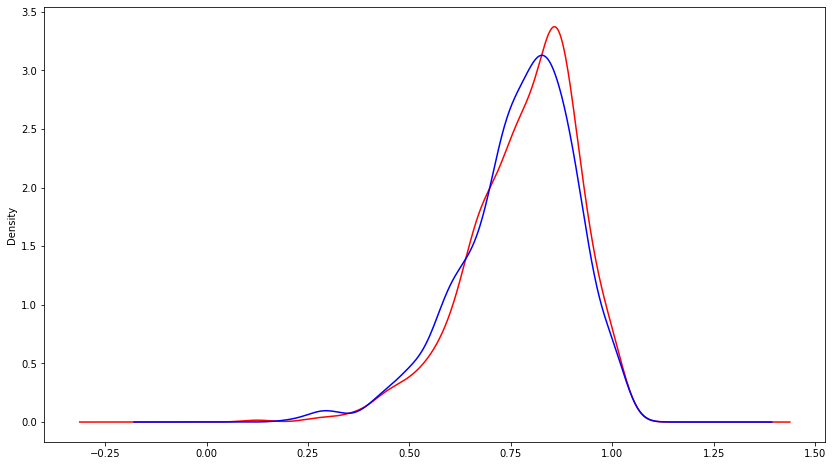

In [34]:
# dataset[['MESTRADO', 'DESEMPENHO']]
fig, ax = plt.subplots(figsize=(14,8))
dataset[dataset['DESEMPENHO'] == 'RUIM']['LICENCIATURA'].plot(kind='kde', color='red', ax=ax)
dataset[dataset['DESEMPENHO'] == 'BOM']['LICENCIATURA'].plot(kind='kde', color='blue', ax=ax)

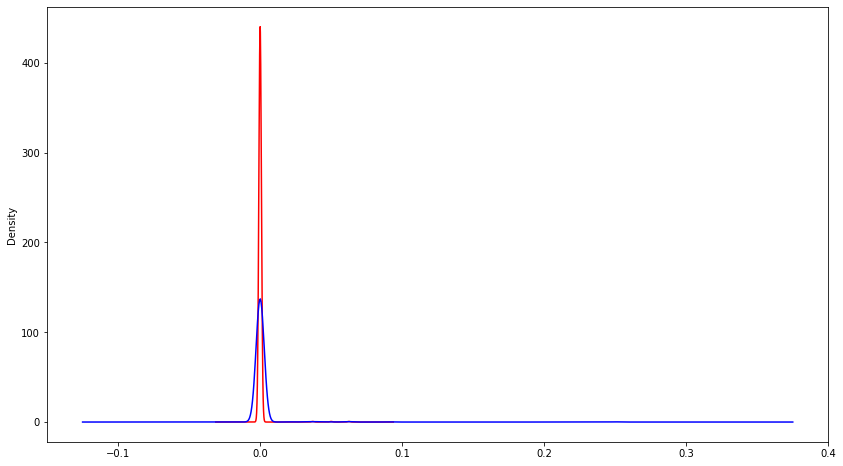

In [35]:
# dataset[['MESTRADO', 'DESEMPENHO']]
fig, ax = plt.subplots(figsize=(14,8))
dataset[dataset['DESEMPENHO'] == 'RUIM']['DOUTORADO'].plot(kind='kde', color='red', ax=ax)
dataset[dataset['DESEMPENHO'] == 'BOM']['DOUTORADO'].plot(kind='kde', color='blue', ax=ax)

In [57]:
dataset = dataset.drop(['CD_ESCOLA', 'ds_comp', 'PONTUACAO'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('DESEMPENHO', axis=1), dataset['DESEMPENHO'], test_size=0.2, random_state=17)

In [12]:
X_train.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)
X_test.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)

## Modeling

In [71]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['DESEMPENHO', 'ANOS_INICIAIS'], axis=1), dataset['ANOS_INICIAIS'], test_size=0.2, random_state=17)

In [169]:
X_train.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)
X_test.drop(['DOUTORADO_BIN', 'MESTRADO_BIN', 'ESPECIALIZACAO_BIN'], axis=1, inplace=True)

In [170]:
y_train = y_train.apply(lambda x: 1 if x > 5.5 else 0)
y_test = y_test.apply(lambda x: 1 if x > 5.5 else 0)

In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

columns = X_train.columns
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1,1))

y_train = scaler.transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

y_train = pd.Series(y_train[:, 0], index=X_train.index, name='ANOS_INICIAIS')
y_test = pd.Series(y_test[:, 0], index=X_test.index, name='ANOS_INICIAIS')

In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = RandomForestRegressor(n_estimators=500, random_state=17, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [150]:
print('MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', mean_squared_error(y_test, pred))
print('R2:', r2_score(y_test, pred))

MAE: 0.11685701574748716
RMSE: 0.021587025557191334
R2: 0.23784021524743426


In [152]:
y_train = scaler.inverse_transform(y_train.values.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.values.reshape(-1,1))
pred = scaler.inverse_transform(pred.reshape(-1,1))

y_train = pd.Series(y_train[:, 0], index=X_train.index, name='ANOS_INICIAIS')
y_test = pd.Series(y_test[:, 0], index=X_test.index, name='ANOS_INICIAIS')
pred = pd.Series(pred[:, 0], index=y_test.index, name='PRED')

(2, 10)

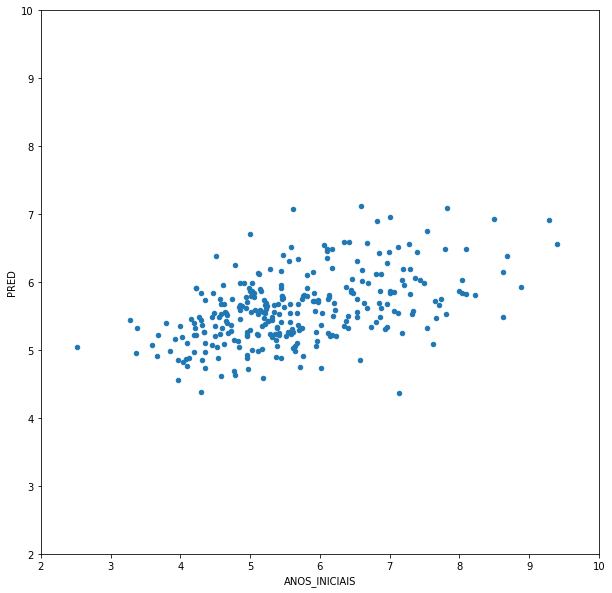

In [154]:
pd.concat([y_test, pred], axis=1).plot(kind='scatter', x='ANOS_INICIAIS', y='PRED', figsize=(10,10))
plt.ylim([2, 10])
plt.xlim([2, 10])

In [123]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)

# columns = X_train.columns
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train, columns=columns)
# X_test = pd.DataFrame(X_test, columns=columns)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# aux = X_train[X_train.isnull().any(axis=1) == True].index
dataset.loc[aux]['COD_ESC']

1422     46541
684     919007
1027    918830
735     904193
909      46536
1376    914848
792     920058
516     912402
1081    900874
Name: COD_ESC, dtype: int64

In [27]:
X_train.loc[X_train.isnull().any(axis=1)]

,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,SALAS_AULA,SALA_RECURSO,TOT_SALAS_AULA,CANTINA,COPA,REFEITORIO,SALA_LEITURA,TOT_SALA_LEITURA,TOT_QUADRA,SALA_PROF,PATIO_COBERTO,PATIO_DESCOBERTO,TOT_VESTIARIO,LAB_INFO,LAB_CIENCIAS,LAB_CIENCIA_FISICA_BIOLOGICA,TOT_LAB_CIENCIA,LAB_MULTIUSO,OFICINA,DORMITORIO,SANITARIO_ADEQ_DEF,SANITARIO_AL_MASC,SANITARIO_AL_FEM,TOT_SANITARIO_AL,TOT_SANITARIO_FUNC,DEPEND_ADEQ_DEF,SALA_ED_FISICA,SALA_PROG_ESC_FAMILIA,BRINQUEDOTECA,SALA_REFORCO,AREA_SERVICO,SALA_ATENDIMENTO,SALA_ENTRETENIMENTO,APERF/EXTENSIAOCULTURAL,BACHARELADO/TECNIOLOGO,DOUTORADO,ENSINO_MEDIO,ESPECIALIZACAO,LICENCIATURA,MESTRADO,S/INFO,QTD_SERVIDORES,COD_ESC,QTD_TOTAL_ALUNOS,QTD_CLASSES,QTD_ALUNOS_ANOS_INICIAIS,MEDIA_ALUNOS_SALA,STD_ALUNOS_SALA,CLUSTER__0,CLUSTER__1,CLUSTER__2,CLUSTER__3,CLUSTER__4,CLUSTER__5,CLUSTER__6,CLUSTER__7,CLUSTER__8,CLUSTER__9,CLUSTER__10,CLUSTER__11,CLUSTER__12,CLUSTER__13,CLUSTER__14,CLUSTER__15,CLUSTER__16,CLUSTER__17,CLUSTER__18,CLUSTER__19
1422,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,14,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.115385,0.038462,0.846154,0.000000,0.0,26,46541,649,23.0,649.0,28.217391,1.536126,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
684,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,6,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0.0,0.071429,0.0,0.000000,0.214286,0.714286,0.000000,0.0,14,919007,371,16.0,371.0,23.187500,3.953374,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1027,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,5,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0.0,0.125000,0.0,0.125000,0.000000,0.750000,0.000000,0.0,8,918830,134,5.0,134.0,26.800000,3.633180,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
735,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,8,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,2,904193,280,12.0,280.0,23.333333,4.228332,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
909,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,11,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1,2,2,0,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.136364,0.090909,0.772727,0.000000,0.0,22,46536,493,18.0,487.0,27.055556,2.363254,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1376,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,12,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0.0,0.076923,0.0,0.384615,0.000000,0.538462,0.000000,0.0,13,914848,428,15.0,316.0,21.066667,4.558613,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
792,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,4,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0.0,0.125000,0.0,0.000000,0.000000,0.875000,0.000000,0.0,8,920058,92,4.0,92.0,23.000000,5.597619,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
516,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,4,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0.0,0.100000,0.0,0.000000,0.100000,0.800000,0.000000,0.0,10,912402,194,8.0,194.0,24.250000,5.700877,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1081,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,4,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,1,2,2,0,0,0,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.090909,0.818182,0.090909,0.0,11,900874,189,10.0,189.0,18.900000,1.969207,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn.linear_model import LogisticRegression

In [196]:
model = RandomForestClassifier(n_estimators=10, random_state=17, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5,random_state=17)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)

In [199]:
print('Acc score:', accuracy_score(y_test, pred))
print('F1 score:', f1_score(y_test, pred))
print('AUC ROC:', roc_auc_score(y_test, pred))

Acc score: 0.5856164383561644
F1 score: 0.5870307167235495
AUC ROC: 0.5871917937135329


In [201]:
## pred train

# pred_train = model.predict(X_train)
# print('Acc score:', accuracy_score(y_train, pred_train))
# print('F1 score:', f1_score(y_train, pred_train))
# print('AUC ROC:', roc_auc_score(y_train, pred_train))

Acc score: 0.7804459691252144
F1 score: 0.7826825127334466
AUC ROC: 0.7814415912092059


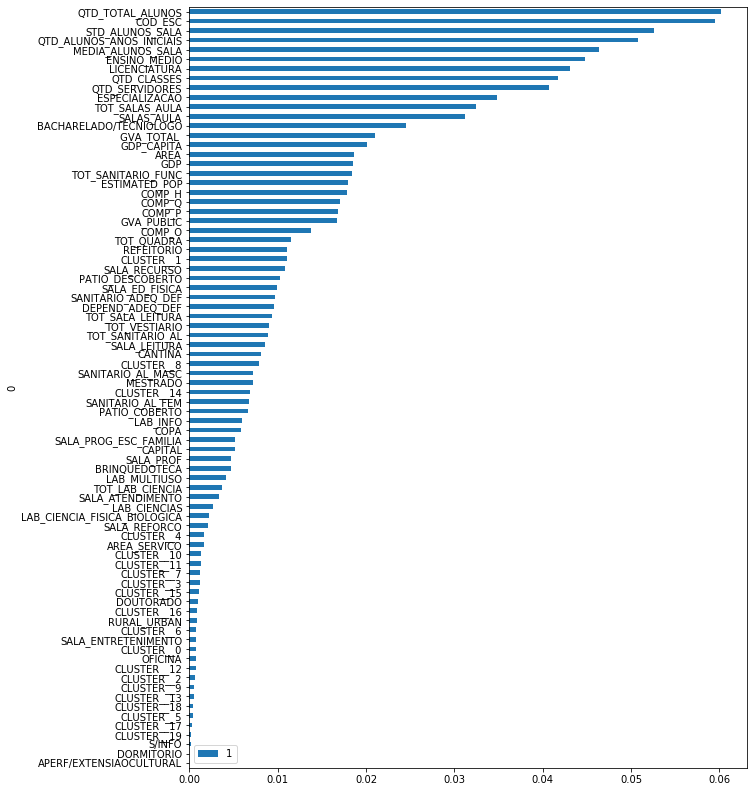

In [97]:
pd.DataFrame(zip(X_train.columns, model.feature_importances_)).set_index(0).sort_values(by=1).plot(kind='barh', figsize=(10, 14))

## Results

1 - Primeiro modelo
 - Acc score: 0.6643835616438356
 - F1 score: 0.6370370370370371
 - AUC ROC: 0.6622936944561998

2 - Valores normalizados das formacoes dos servidores (antes era contagem)
- Acc score: 0.6575342465753424
- F1 score: 0.6212121212121212
- AUC ROC: 0.654441152959985

3 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES
- Acc score: 0.636986301369863
- F1 score: 0.5923076923076923
- AUC ROC: 0.6331875675929844


4 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES (CORRECAO) - filtrar professores Basico I
- Acc score: 0.6506849315068494
- F1 score: 0.6772151898734177
- AUC ROC: 0.6482343536935158

5 - Valores normalizados das formacoes dos servidores e QTD_SERVIDORES. Remocao de {FORMACAO}_BIN
- Acc score: 0.6746575342465754
- F1 score: 0.6984126984126985
- AUC ROC: 0.6724267644707764

6 - Contagem das formacoes dos servidores e QTD_SERVIDORES. Remocao de {FORMACAO}_BIN
- Acc score: 0.6712328767123288
- F1 score: 0.6981132075471698
- AUC ROC: 0.668500493722669

7 - Configuracao 6 e transformacao em CLUSTER para One Hot Encoder
- Acc score: 0.6986301369863014
- F1 score: 0.7124183006535948
- AUC ROC: 0.6979357690318334